In [1]:
from networkx.utils.misc import flatten
from snn import SyntheticNearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
import generator as gen
import ridgeNN

In [2]:
params = {
    'n_neighbors': 1,
    # 'weights': 'distance',
    'verbose': False,
    # 'spectral_t': 0.999,
    # 'max_rank': 3, # --> RMSE ~ 0.1
    'min_value': 1,
    'max_value': 5,
}
snn = SyntheticNearestNeighbors(**params)

RMSE: 0.4030±0.020
MAE: 0.2106±0.013


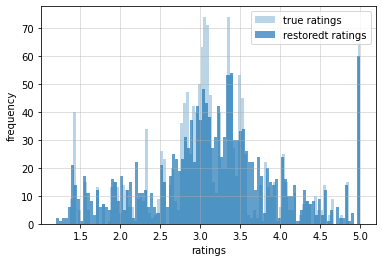

In [5]:
rating_matrix, P = gen.getRatingAndPropensityMatrix()
# sample D:
D = np.random.binomial(1, P)

RMSEs = []
MAEs = []
for _ in range(3):
    D = np.random.binomial(1, P)
    Y = rating_matrix * D
    Y[D == 0] = np.nan
    Y_restored = snn.fit_transform(Y)
    #Y_restored = ridgeNN.RidgeNN(D, Y)
    Y_restored[Y_restored < 1] = 1
    Y_restored[Y_restored > 5] = 5
    Error = (rating_matrix - Y_restored).flatten()
    RMSEs.append(np.sqrt(np.mean(Error ** 2)))
    MAEs.append(np.mean(np.abs(Error)))

print(f"RMSE: {np.mean(RMSEs):.4f}±{np.sqrt(np.var(RMSEs)):.3f}")
print(f"MAE: {np.mean(MAEs):.4f}±{np.sqrt(np.var(MAEs)):.3f}")
# distribution of true vs restored samples:
plt.hist(rating_matrix.flatten(), bins=100, alpha=0.3, label="true ratings")
plt.hist(Y_restored.flatten(), bins=100, color='C0', alpha=0.7, label="restoredt ratings")
plt.xlabel('ratings')
plt.ylabel('frequency')
plt.grid(alpha=0.5)
plt.legend()
plt.legend(loc="upper right");